In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
digits = ds.load_digits()
X, y = digits.data, digits.target

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### 使用KNN计算准确度，查看消耗时间

In [5]:
%%time

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: user 6.34 ms, sys: 665 µs, total: 7.01 ms
Wall time: 7.34 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn.score(X_test, y_test)

0.9888888888888889

In [7]:
pca = PCA(5)

In [8]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X_train_reduce = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)

### 使用PCA降维后，运算时间变少

In [10]:
%%time
knn2 = KNeighborsClassifier()
knn2.fit(X_train_reduce, y_train)

CPU times: user 3.19 ms, sys: 485 µs, total: 3.68 ms
Wall time: 2.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
knn2.score(X_test_reduce, y_test)

0.925

### explained_variance_ 主成分解释的方差

In [12]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316557])

In [13]:
pca_all = PCA(n_components=X.shape[1])
pca_all.fit(X)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca_all.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

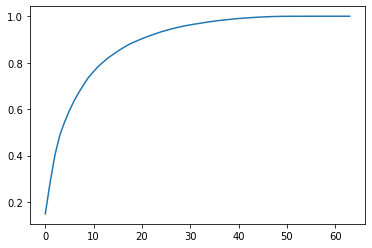

In [15]:
n = X.shape[1]
plt.plot([i for i in range(n)], [np.sum(pca_all.explained_variance_ratio_[:i+1]) for i in range(n)])

### 根据百分比推导要多少维度

In [16]:
pca_percent = PCA(0.95)
pca_percent.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca_percent.n_components_

29

In [18]:
X_train_reduce = pca_percent.transform(X_train)
X_test_reduce = pca_percent.transform(X_test)

In [19]:
%%time
knn3 = KNeighborsClassifier()
knn3.fit(X_train_reduce, y_train)

CPU times: user 4.95 ms, sys: 1.6 ms, total: 6.55 ms
Wall time: 6.68 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
knn3.score(X_test_reduce, y_test)

0.9888888888888889

### 绘制手写识别

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()

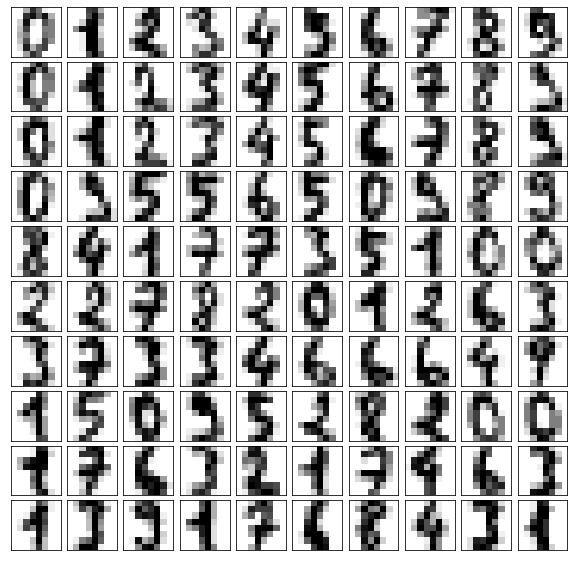

In [23]:
plot_digits(X[:100])